# Nutrition Insights from the Starbucks Menu

As a past daily Starbucks customer, I'm very curious to explore this project, and find information that isn't obvious from being a daily customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_drinks = pd.read_csv(r'/Users/carlriemann/Documents/GitHub/Data-Storytelling/data/starbucks_drinkMenu_expanded.csv', encoding='ISO-8859-1')

In [3]:
#df_food = pd.read_csv(r'/Users/carlriemann/Documents/GitHub/Data-Storytelling/data/starbucks-menu-nutrition-food.csv',encoding='utf-16')

#df_food.info
#print(df_food)

#df_food_cleaned = df_food['Calories, Fat (g), Carb. (g), Fiber (g), Protein (g)'].str.split(',', expand=True)

#df_food_cleaned.columns = ['Item', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)']



In [4]:
df_drinks.info()
print(df_drinks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

Some data wrangling needs to be done, as the file was imported but the rows and columns are in the wrong format.

Okay now that the data is cleaned, lets start analyzing the drinks menu.

In [5]:
categories = df_drinks['Beverage_category'].value_counts()
print(categories)

Beverage_category
Classic Espresso Drinks               58
TazoÂ® Tea Drinks                     52
Signature Espresso Drinks             40
FrappuccinoÂ® Blended Coffee          36
Shaken Iced Beverages                 18
FrappuccinoÂ® Blended CrÃ¨me          13
FrappuccinoÂ® Light Blended Coffee    12
Smoothies                              9
Coffee                                 4
Name: count, dtype: int64


In [6]:
df_drinks.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


<Figure size 1000x600 with 0 Axes>

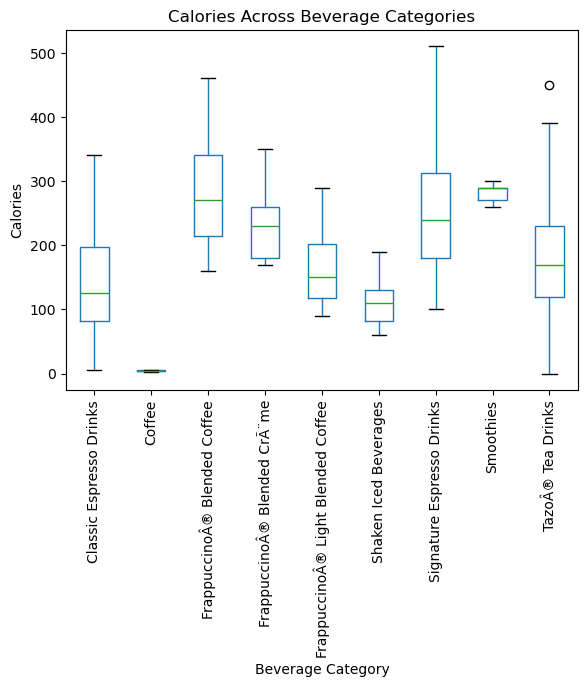

In [7]:
plt.figure(figsize=(10, 6))
df_drinks.boxplot(column='Calories', by='Beverage_category', grid=False, rot=90)
plt.title('Calories Across Beverage Categories')
plt.suptitle('')
plt.xlabel('Beverage Category')
plt.ylabel('Calories')
plt.show()

So the smoothies beverage category seems to be the highest, followed by frappuccino blended coffee. From my daily starbucks experience I expected frappuccinos to be first. There is also one outlier in the tazo tea drinks which I will check.

In [8]:
smoothies = df_drinks[df_drinks['Beverage_category'] == 'Smoothies']
smoothies_nutrition = smoothies.describe()
print(smoothies_nutrition)

         Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count    9.000000        9.000000           9.000000      9.000000   
mean   282.222222        0.933333           0.011111      6.111111   
std     13.017083        0.763217           0.033333      3.333333   
min    260.000000        0.300000           0.000000      5.000000   
25%    270.000000        0.400000           0.000000      5.000000   
50%    290.000000        0.500000           0.000000      5.000000   
75%    290.000000        1.500000           0.000000      5.000000   
max    300.000000        2.500000           0.100000     15.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                   9.000000          9.000000            9.000000   
mean                  132.777778         54.555556            6.777778   
std                    15.833333          2.697736            0.666667   
min                   120.000000         51.000000            6.000000   

In [9]:
frappuccinos = df_drinks[df_drinks['Beverage_category'] == 'FrappuccinoÂ® Blended Coffee']
frap_nutrition = frappuccinos.describe()
print(frap_nutrition)

         Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count   36.000000        36.00000          36.000000     36.000000   
mean   276.944444         1.70000           0.038889      4.444444   
std     81.339481         1.73617           0.059894      5.577734   
min    160.000000         0.00000           0.000000      0.000000   
25%    215.000000         0.20000           0.000000      0.000000   
50%    270.000000         1.25000           0.000000      0.000000   
75%    340.000000         3.00000           0.100000     10.000000   
max    460.000000         7.00000           0.200000     15.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                  36.000000         36.000000           36.000000   
mean                  230.277778         59.638889            0.777778   
std                    62.723252         16.654734            0.831904   
min                   150.000000         35.000000            0.000000   

In [10]:
tazo_tea = df_drinks[df_drinks['Beverage_category'] == 'TazoÂ® Tea Drinks']
highest_calorie_tea = tazo_tea[tazo_tea['Calories'] == tazo_tea['Calories'].max()]
print(highest_calorie_tea)

     Beverage_category                Beverage Beverage_prep  Calories  \
128  TazoÂ® Tea Drinks  TazoÂ® Green Tea Latte       2% Milk       450   

     Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
128             10             5.0                0.3            40   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
128                        230                72                   2   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
128           71           17.0               25%              20%   

     Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
128              50%           6%           110  


For this project it will be interesting to see the ingredients distribution of all drink categories. Specifically how much each type of Beverage Prep affects its Nutrional Values, and how size affects it too, within each category.

In [11]:
df_drinks.columns = df_drinks.columns.str.strip()

columns_to_convert = ['Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 
                      'Sodium (mg)', 'Total Carbohydrates (g)', 
                      'Cholesterol (mg)', 'Dietary Fibre (g)', 
                      'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']

for column in columns_to_convert:
    if df_drinks[column].dtype == 'object':
        df_drinks[column] = pd.to_numeric(df_drinks[column].str.strip(), errors='coerce')
    else:
        df_drinks[column] = pd.to_numeric(df_drinks[column], errors='coerce')


print(df_drinks.dtypes)
print(df_drinks.info())


Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)              float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 n

<Figure size 1200x800 with 0 Axes>

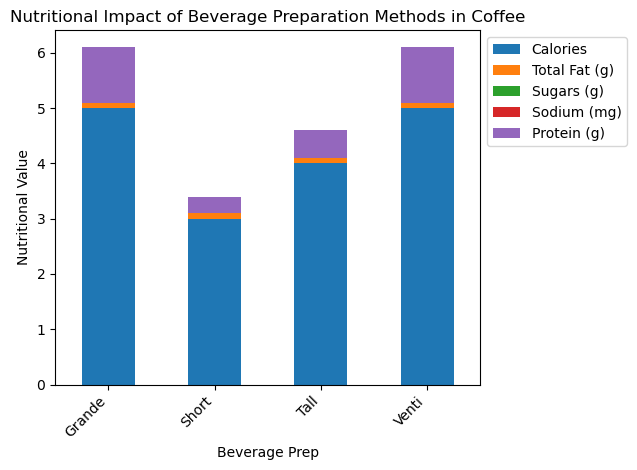

<Figure size 1200x800 with 0 Axes>

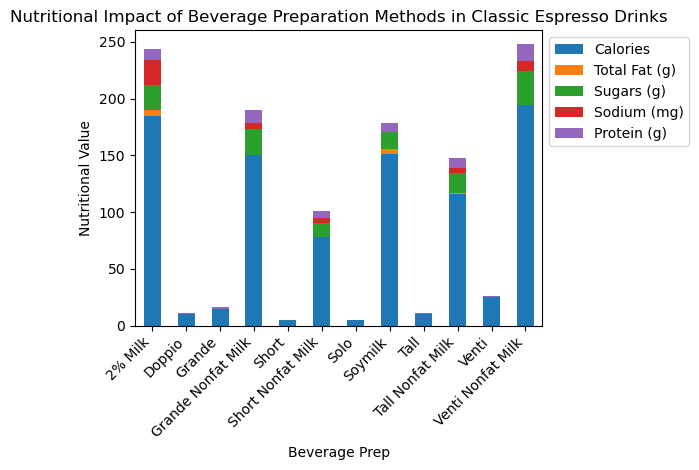

<Figure size 1200x800 with 0 Axes>

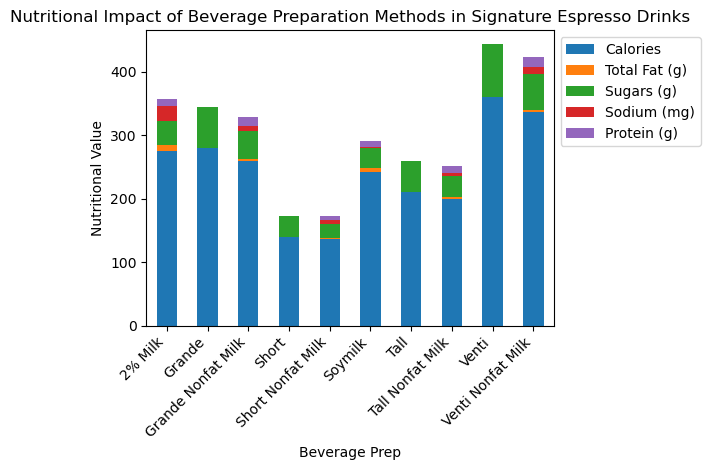

<Figure size 1200x800 with 0 Axes>

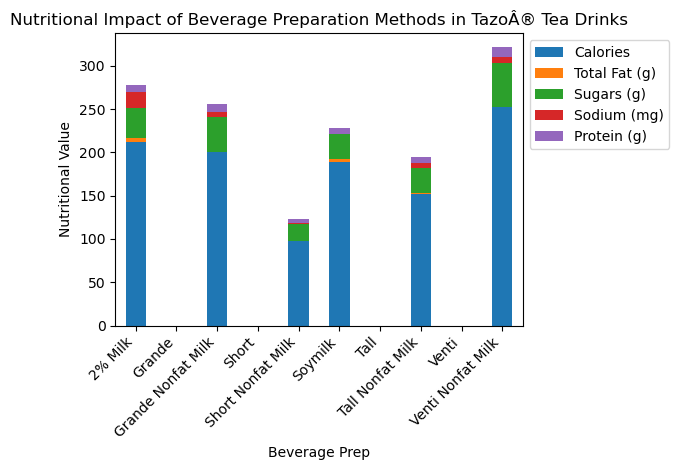

<Figure size 1200x800 with 0 Axes>

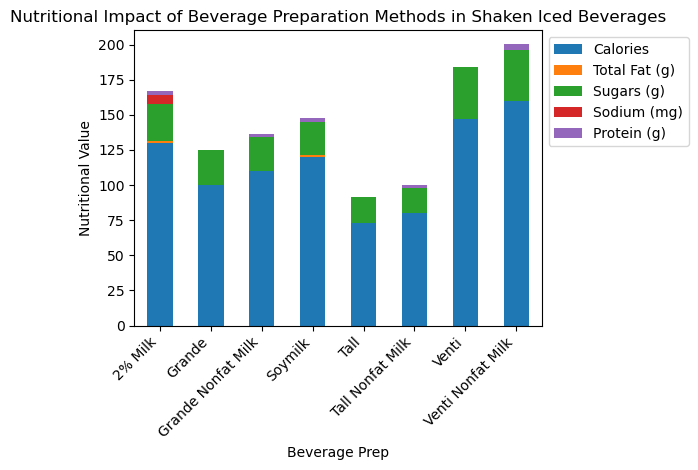

<Figure size 1200x800 with 0 Axes>

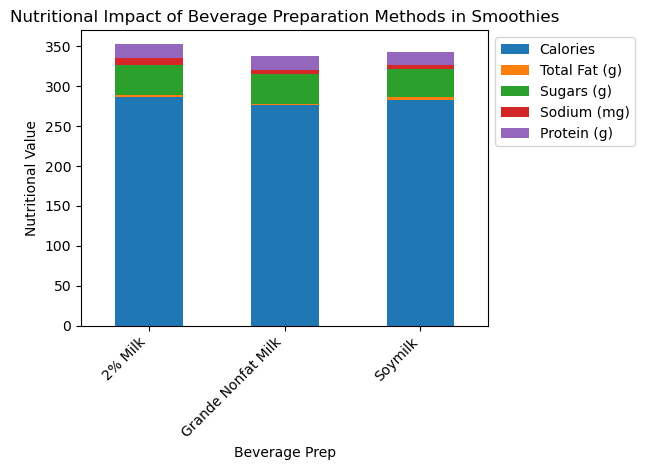

<Figure size 1200x800 with 0 Axes>

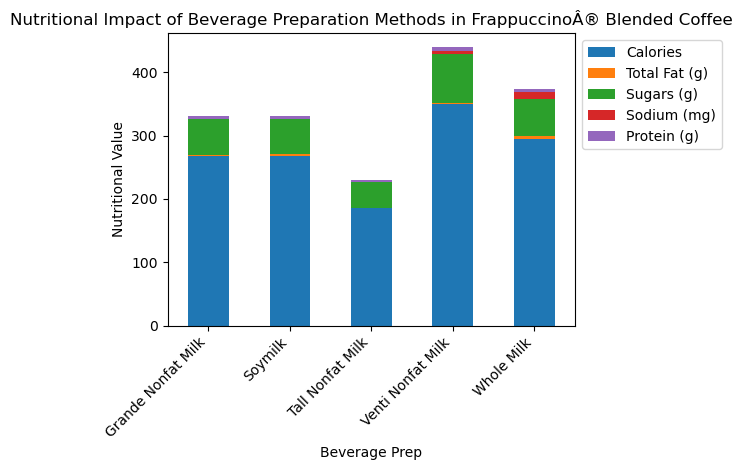

<Figure size 1200x800 with 0 Axes>

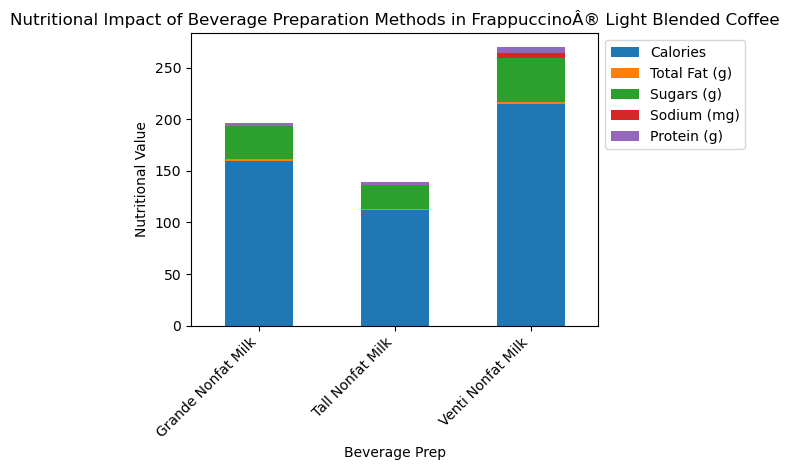

<Figure size 1200x800 with 0 Axes>

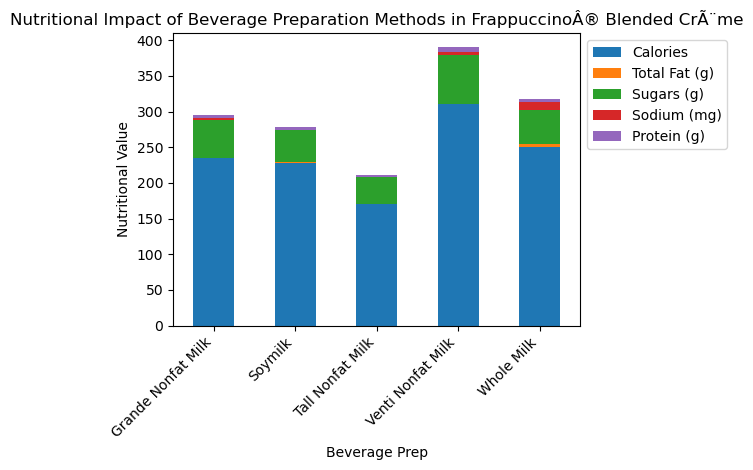

In [12]:
nutritional_columns = ['Calories', 'Total Fat (g)', 'Sugars (g)', 'Sodium (mg)', 'Protein (g)']

#Group by Beverage Category and Prep, calculate mean nutritional values for each prep type
grouped = df_drinks.groupby(['Beverage_category', 'Beverage_prep'])[nutritional_columns].mean().reset_index()

#Plot the results for each beverage category
beverage_categories = df_drinks['Beverage_category'].unique()

for category in beverage_categories:
    plt.figure(figsize=(12, 8))
    category_data = grouped[grouped['Beverage_category'] == category]
    
    # Create bar plot for each category to show how beverage prep affects nutritional values
    category_data.set_index('Beverage_prep')[nutritional_columns].plot(kind='bar', stacked=True)
    
    plt.title(f'Nutritional Impact of Beverage Preparation Methods in {category}')
    plt.xlabel('Beverage Prep')
    plt.ylabel('Nutritional Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show

In [13]:
# Get all unique categories from the Beverage_category column
all_categories = df_drinks['Beverage_category'].unique()

# Define the columns we want to consider
nutritional_columns = ['Calories', 'Total Fat (g)', 'Sugars (g)', 'Sodium (mg)', 'Protein (g)']

# Step 1: Filter and sort the data for each specific category
for category in all_categories:
    # Filter the data for the specific category
    category_data = df_drinks[df_drinks['Beverage_category'] == category]
    
    # Sort the data by Calories in descending order
    category_data_sorted = category_data.sort_values(by='Calories', ascending=False)
    
    # Print the sorted data for each category
    print(f"\nBeverage Preps for {category} (Sorted by Calories):")
    print(category_data_sorted[['Beverage_prep'] + nutritional_columns].to_string(index=False))


Beverage Preps for Coffee (Sorted by Calories):
Beverage_prep  Calories  Total Fat (g)  Sugars (g)  Sodium (mg)  Protein (g)
       Grande         5            0.1           0            0          1.0
        Venti         5            0.1           0            0          1.0
         Tall         4            0.1           0            0          0.5
        Short         3            0.1           0            0          0.3

Beverage Preps for Classic Espresso Drinks (Sorted by Calories):
     Beverage_prep  Calories  Total Fat (g)  Sugars (g)  Sodium (mg)  Protein (g)
           2% Milk       340           11.0          43           30         17.0
           2% Milk       320            9.0          44           35         15.0
           Soymilk       290            9.0          33            0         14.0
 Venti Nonfat Milk       280            3.0          44           10         17.0
           Soymilk       270            7.0          33            0         12.0
        

In [14]:
# Group by Beverage_prep (all beverage prep types) and calculate the mean nutritional values
all_prep_nutritional_impact = df_drinks.groupby('Beverage_prep')[nutritional_columns].mean().reset_index()

# Sort the results by Calories in descending order
all_prep_nutritional_impact_sorted = all_prep_nutritional_impact.sort_values(by='Calories', ascending=False)

# Print the sorted results (top entries with most calories)
print(all_prep_nutritional_impact_sorted)

         Beverage_prep    Calories  Total Fat (g)  Sugars (g)  Sodium (mg)  \
12          Whole Milk  283.750000       4.562500   55.687500    11.562500   
11   Venti Nonfat Milk  260.000000       1.322727   50.045455     6.590909   
0              2% Milk  218.000000       5.520000   30.980000    19.600000   
3   Grande Nonfat Milk  209.615385       1.134615   38.615385     3.653846   
7              Soymilk  207.272727       4.076923   31.848485     0.454545   
9     Tall Nonfat Milk  147.826087       0.813043   28.521739     2.608696   
10               Venti  118.571429       0.028571   27.714286     0.000000   
5    Short Nonfat Milk   99.166667       0.658333   17.000000     3.750000   
2               Grande   85.714286       0.028571   20.000000     0.000000   
8                 Tall   63.428571       0.014286   14.714286     0.000000   
4                Short   37.000000       0.025000    8.250000     0.000000   
1               Doppio   10.000000       0.000000    0.000000   

As we can observe from the data, the whole milk alternative is the one that offers the most calories, followed by Venti-Nonfat-Milk, and 2% Milk. 

# Identifying how milk type affects beverages nutritional value
for this step I will take the beverages which have the most information in Beverage type

In [15]:
#Select the Beverages with the highest number of beverage prep types for each beverage
beverage_prep_counts = df_drinks.groupby('Beverage')['Beverage_prep'].nunique().reset_index()
beverage_prep_counts.columns = ['Beverage', 'Prep_Count']

print(beverage_prep_counts)

                                             Beverage  Prep_Count
0                           Banana Chocolate Smoothie           3
1                                       Brewed Coffee           4
2                                    CaffÃ¨ Americano           4
3                                        CaffÃ¨ Latte           6
4                CaffÃ¨ Mocha (Without Whipped Cream)           6
5                                          Cappuccino           6
6                                             Caramel           3
7                     Caramel (Without Whipped Cream)           5
8         Caramel Apple Spice (Without Whipped Cream)           4
9                                   Caramel Macchiato           6
10                                             Coffee           5
11                                           Espresso           2
12              Hot Chocolate (Without Whipped Cream)           6
13            Iced Brewed Coffee (With Classic Syrup)           3
14     Ice

In [16]:
# Step 2: Sort by the number of prep types and select the top beverages with the most variations
top_beverages = beverage_prep_counts.sort_values(by='Prep_Count', ascending=False).head(10) #Taking top 10
print("Top Beverages with the Most Prep Types:")
print(top_beverages)

Top Beverages with the Most Prep Types:
                                            Beverage  Prep_Count
32     White Chocolate Mocha (Without Whipped Cream)           6
31          Vanilla Latte (Or Other Flavoured Latte)           6
3                                       CaffÃ¨ Latte           6
4               CaffÃ¨ Mocha (Without Whipped Cream)           6
5                                         Cappuccino           6
28                            TazoÂ® Green Tea Latte           6
27                        TazoÂ® Full-Leaf Tea Latte           6
26  TazoÂ® Full-Leaf Red Tea Latte (Vanilla Rooibos)           6
9                                  Caramel Macchiato           6
25                             TazoÂ® Chai Tea Latte           6


<Figure size 1200x800 with 0 Axes>

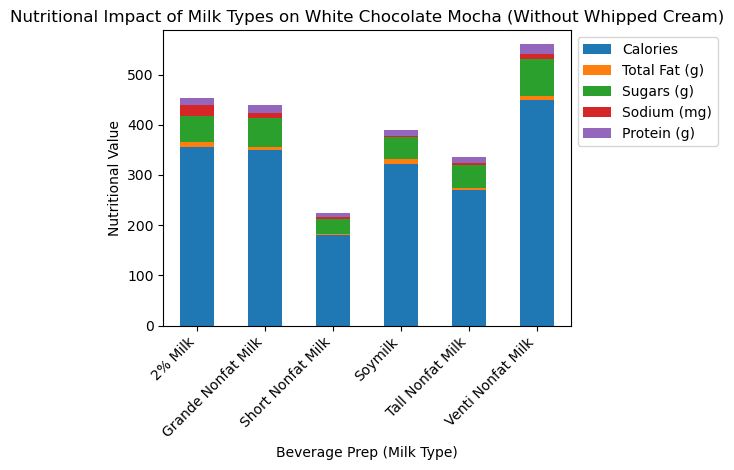

<Figure size 1200x800 with 0 Axes>

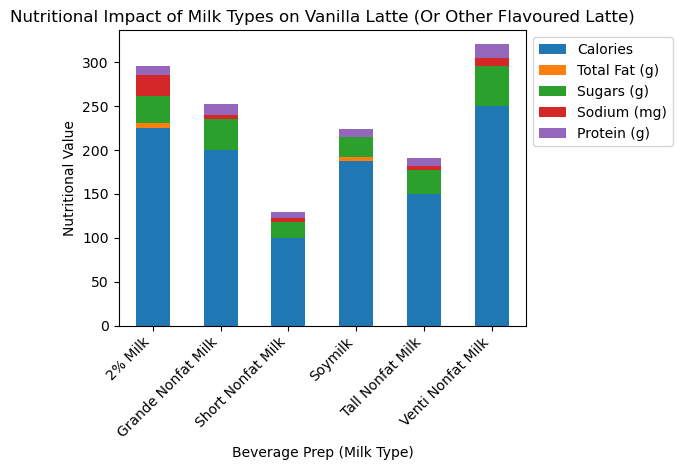

<Figure size 1200x800 with 0 Axes>

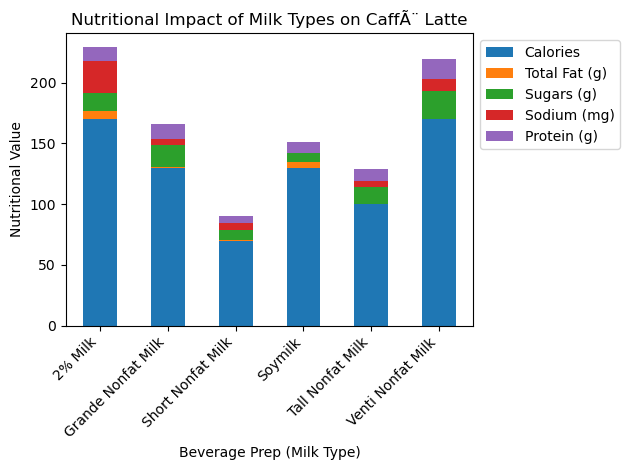

<Figure size 1200x800 with 0 Axes>

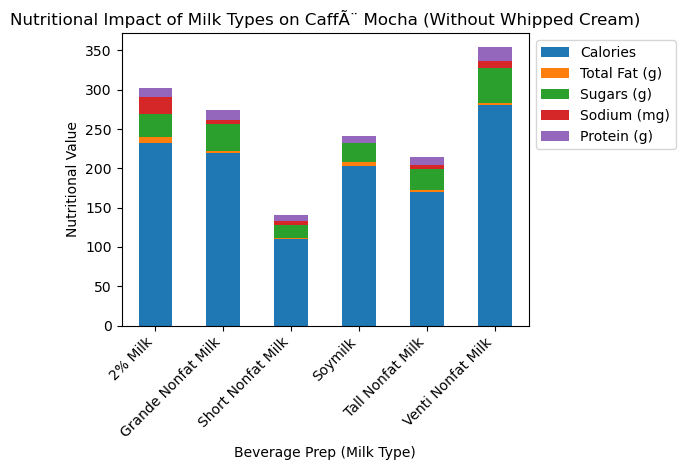

<Figure size 1200x800 with 0 Axes>

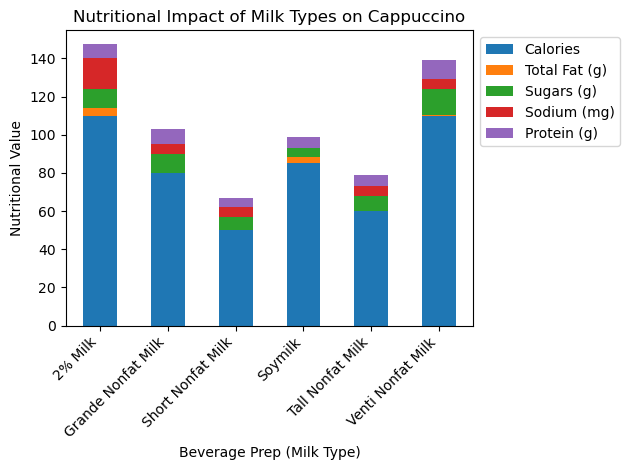

<Figure size 1200x800 with 0 Axes>

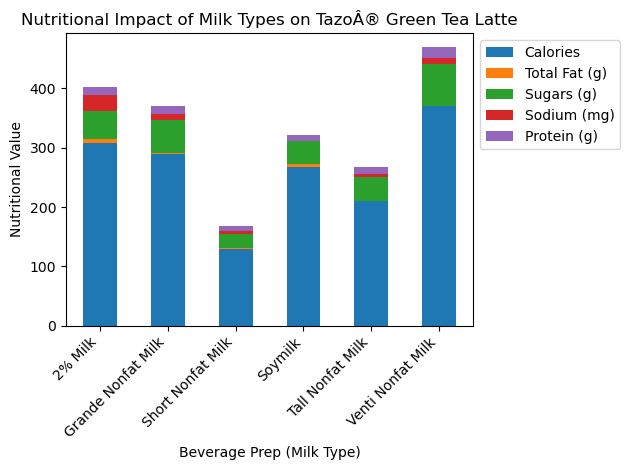

<Figure size 1200x800 with 0 Axes>

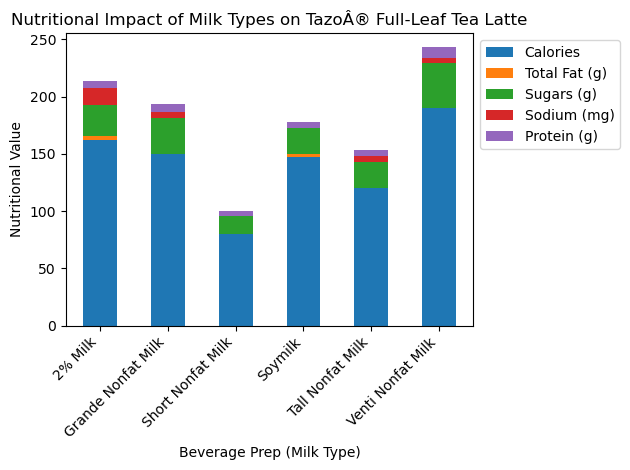

<Figure size 1200x800 with 0 Axes>

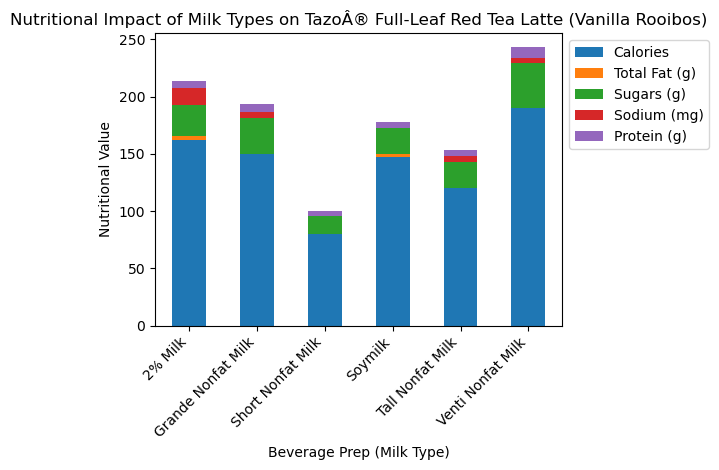

<Figure size 1200x800 with 0 Axes>

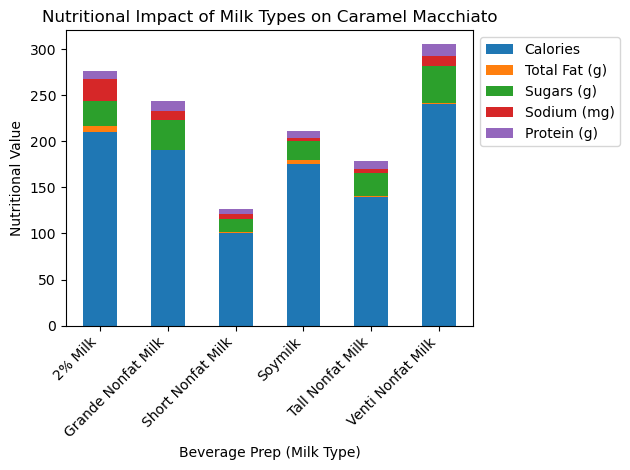

<Figure size 1200x800 with 0 Axes>

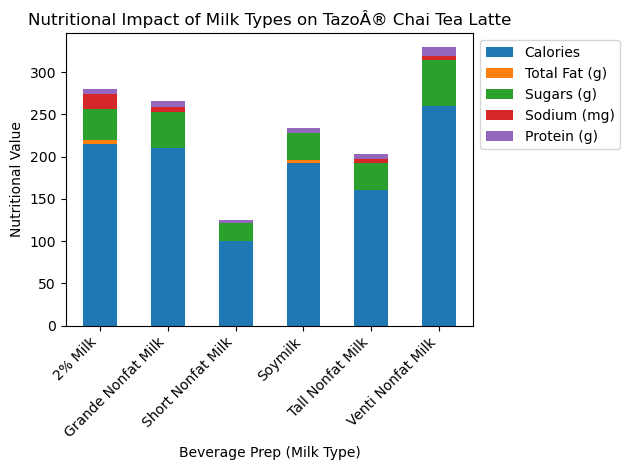

In [18]:
top_beverages_list = top_beverages['Beverage'].tolist()
top_beverages_data = df_drinks[df_drinks['Beverage'].isin(top_beverages_list)]
nutritional_impact_by_prep = top_beverages_data.groupby(['Beverage', 'Beverage_prep'])[nutritional_columns].mean().reset_index()

for beverage in top_beverages_list:
    beverage_data = nutritional_impact_by_prep[nutritional_impact_by_prep['Beverage'] == beverage]
    
    #plot graph
    plt.figure(figsize=(12, 8))
    beverage_data.set_index('Beverage_prep')[nutritional_columns].plot(kind='bar', stacked=True)
    
    plt.title(f'Nutritional Impact of Milk Types on {beverage}')
    plt.xlabel('Beverage Prep (Milk Type)')
    plt.ylabel('Nutritional Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

In [ ]:
# Group by 'Beverage_prep' (milk types) and calculate the mean nutritional values for numeric columns
milk_nutritional_contribution = nutritional_impact_by_prep.groupby('Beverage_prep')[nutritional_columns].mean().reset_index()

# Sort the results by Calories in descending order (or any other nutritional column you prefer)
milk_nutritional_contribution_sorted = milk_nutritional_contribution.sort_values(by='Calories', ascending=False)

# Print the sorted mean nutritional values for each milk type
print("Average Nutritional Contribution of Each Milk Type (Sorted by Calories):")
print(milk_nutritional_contribution_sorted)

According to this analysis I will be ordering all my next coffees from Starbucks with Soymilk, as it appears to be the healthiest choice.